<a href="https://colab.research.google.com/github/Irtisam99/CVPR/blob/main/MID/digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model Train (Mnist Dataset) using TensorFlow--Dense Network

###Necessary Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist


import os
import random
import numpy as np
import matplotlib.pyplot as plt

os.environ['TFF_CPP_MIN_LOG_LEVEL']='2'

%matplotlib inline

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#9): Which is digit '4'


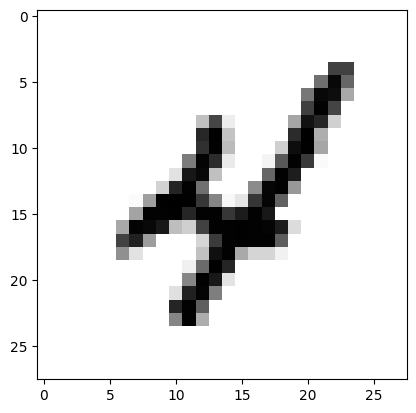

In [ ]:

digit = 9 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

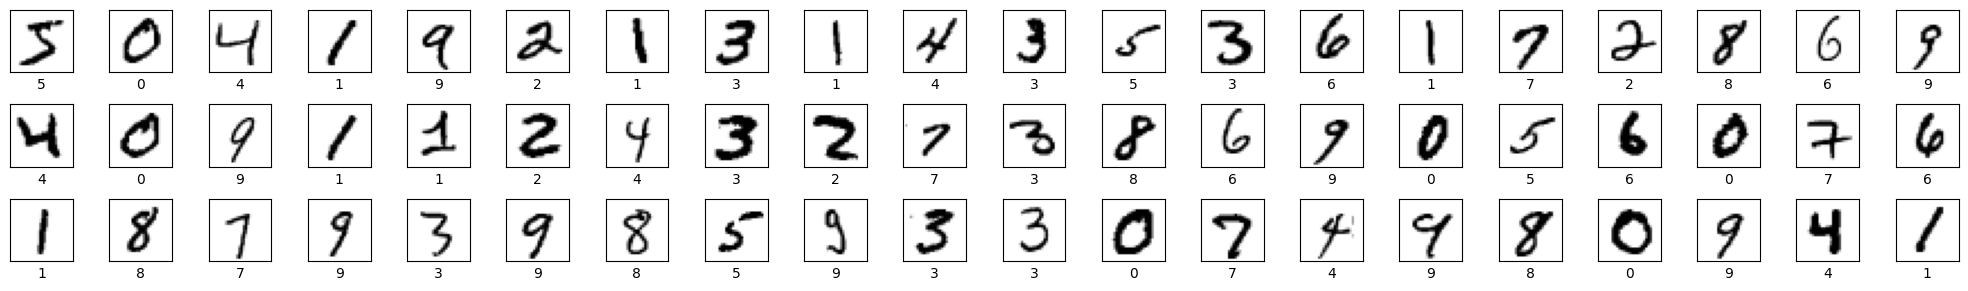

In [ ]:
i=0
plt.figure(figsize=(20,3))
for r in range(3):
  for c in range(20):
    plt.subplot(3,20,i+1)
    plt.imshow(x_train[i],cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])
    i=i+1
plt.tight_layout()
plt.show()



In [ ]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0


Image (#9): Which is digit '4'


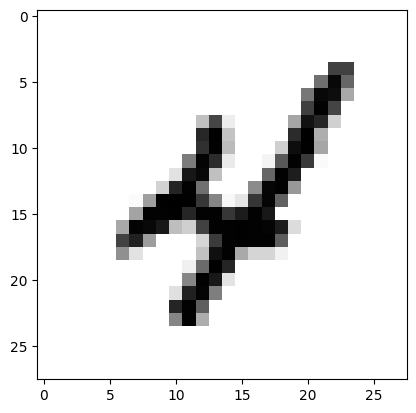

In [ ]:

digit = 9 # Change to choose new digit
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(28*28,)),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()



# Experimental CNN application--
# model_cnn = keras.Sequential([
#     keras.Input(shape=(28,28,1)),          # Directly use image shape
#     layers.Conv2D(32, (3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, (3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])

# model_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)


Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8635 - loss: 0.4807 - val_accuracy: 0.9562 - val_loss: 0.1467
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9680 - loss: 0.1065 - val_accuracy: 0.9676 - val_loss: 0.1109
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9800 - loss: 0.0661 - val_accuracy: 0.9671 - val_loss: 0.1167
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9854 - loss: 0.0489 - val_accuracy: 0.9713 - val_loss: 0.1042
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9898 - loss: 0.0344 - val_accuracy: 0.9723 - val_loss: 0.0982


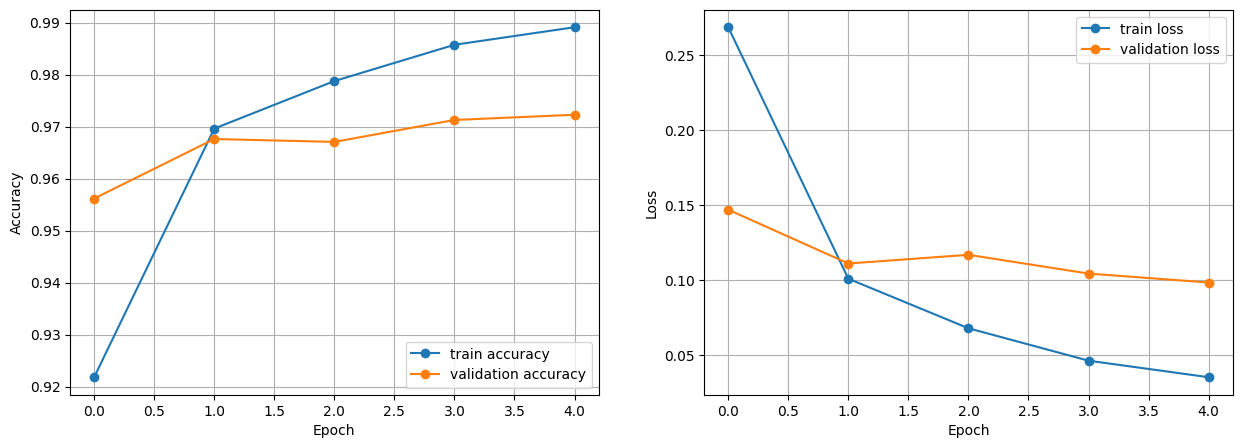

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9708 - loss: 0.0927

Test accuracy: 0.9745000004768372


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
cvpr_folder = "/content/drive/MyDrive/CVPR"
model.save(os.path.join(cvpr_folder, "mnist_model.keras"))
